In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
tf.reset_default_graph()

In [3]:
#word sentences
sentences = [ "i like dog", "i like cat", "i like animal",
              "dog cat animal", "apple cat dog like", "dog fish milk like",
              "dog cat eyes like", "i like apple", "apple i hate",
              "apple i movie book music like", "cat dog hate", "cat dog like"]

In [16]:
word_sequence = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))
word_dict = {w:i for i,w in enumerate(word_list)}

In [10]:
#word2vec parameter
batch_size = 20
embedding_size = 2 #to show 2 dim embedding graph
num_sampled = 10 #for negative sampling,less than batch_size
voc_size = len(word_list)

In [25]:
def random_batch(data, size):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)), size, replace=False)
    
    for i in random_index:
        random_inputs.append(data[i][0])
        random_labels.append([data[i][1]])
    return random_inputs, random_labels

In [17]:
#make skip-gram of one size window
skip_grams = []
for i in range(1, len(word_sequence)-1):
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i-1]], word_dict[word_sequence[i+1]]]
    
    for w in context:
        skip_grams.append([target,w])

In [18]:
#model
inputs = tf.placeholder(tf.int32, shape=[batch_size])
labels = tf.placeholder(tf.int32, shape=[batch_size,1])

In [19]:
embeddings = tf.Variable(tf.random_uniform([voc_size, embedding_size],-1.0, 1.0))
selected_embed = tf.nn.embedding_lookup(embeddings, inputs)

In [20]:
nce_weights = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
nce_biases = tf.Variable(tf.zeros([voc_size]))

In [22]:
cost = tf.reduce_mean(tf.nn.nce_loss(nce_weights, nce_biases,labels, selected_embed, num_sampled, voc_size))

In [23]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [28]:
#training
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for epoch in range(5000):
        batch_inputs, batch_labels = random_batch(skip_grams, batch_size)
        _, loss = sess.run([optimizer, cost], feed_dict={inputs: batch_inputs, labels: batch_labels})
        if (epoch+1) % 1000 ==0:
            print('Epoch: {:4d} cost={:.6f}'.format(epoch+1, loss))
    train_embedding = embeddings.eval()

Epoch: 5000 cost=3.079615
Epoch: 10000 cost=2.778163
Epoch: 15000 cost=2.440109
Epoch: 20000 cost=2.964214
Epoch: 25000 cost=2.869705
Epoch: 30000 cost=2.636805
Epoch: 35000 cost=2.643198
Epoch: 40000 cost=2.620606
Epoch: 45000 cost=2.789778
Epoch: 50000 cost=2.740453


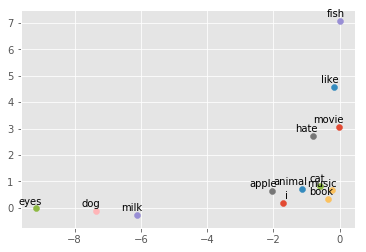

In [29]:
plt.style.use('ggplot')
for i, label in enumerate(word_list):
    x,y = train_embedding[i]
    plt.scatter(x,y)
    plt.annotate(label, xy=(x,y), xytext=(5,2), textcoords='offset points', ha='right', va='bottom')
plt.show()